In [1]:
import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmwl/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import pickle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hmm_data_a.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access the loaded data
loaded_ss = loaded_data['state_sequence']
loaded_data = loaded_data['data']

In [15]:
# changes made
# degrees of freedom added 1
# updated rho in init - should break now ?

# todo
# likelihood
# return Gaussian HMM - somehow select states with high count
# numba functions


In [7]:
import final.models.hdphmm.hdphmmwl.hdphmmwl as hdphmm
from final.models.hdphmm.helpers.plot_hmm import plot_hmm_data
import final.models.hdphmm.hdphmmwl.consts as const
import final.models.hdphmm.hdphmmwl.numba_wl as numba
reload(const)
reload(numba)
reload(hdphmm)

sbp = {
    const.ALPHA0: 0.8,
    const.GAMMA0: 1,
    const.KAPPA0: 0.02,
}
sbp[const.RHO0] = sbp[const.KAPPA0] / ( sbp[const.KAPPA0] + sbp[const.ALPHA0])
temp = 1
hdp_hmm = hdphmm.HDPHMMWL([loaded_data], 20, loaded_ss, iterations=300, sbp=sbp)

sbp given
init ari 0.052


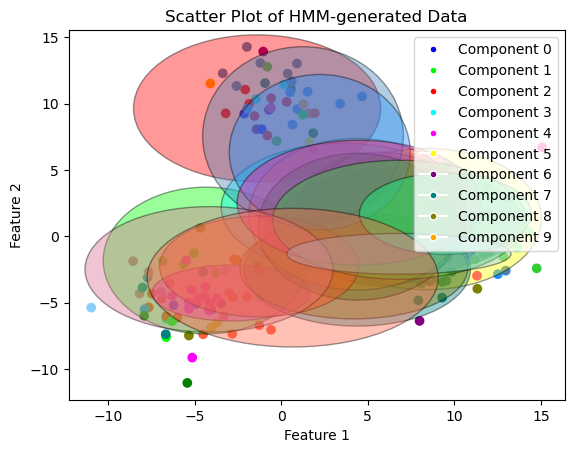

In [8]:
plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma)
# hdp_hmm.gibbs_sweep()

In [9]:
hdp_hmm.fit(verbose=False)

[[ 4.66554346 10.55724412]]
[[ 4.66554346 10.55724412]]
[[  4.66554346  10.55724412]
 [ -0.27296454   7.18521295]
 [ -0.71242842   9.53408568]
 [  0.64487399   8.42868081]
 [  7.63729877  -3.19808728]
 [  5.79949081   0.60012858]
 [ -2.83394535  -7.36071611]
 [ -7.66389606  -5.35810259]
 [ -1.04604429  13.93547518]
 [  1.5921656    9.26556116]
 [ -0.94106939  11.5564911 ]
 [  0.92409502   9.58799897]
 [  5.30801228  -1.16853007]
 [ 15.06961928   6.71176887]
 [  8.27420231   1.13845512]
 [ 11.25708699   1.16112037]
 [  8.46760103   2.14296987]
 [ 11.73749292   3.05605425]
 [  8.84496917  -0.48638796]
 [ 11.99986914  -1.16363048]
 [ 11.09540136   0.06325768]
 [  9.14105734  -0.6428347 ]
 [ 11.67511544  -1.30230738]
 [  8.58953348  -3.38071096]
 [ 11.90973446   3.82358435]
 [  9.5437723    1.4773984 ]
 [ 10.95720912   0.54220565]
 [  9.54437056  -3.34647484]
 [  7.16207226   0.29604107]
 [  8.34745031  -1.86538372]
 [ 12.7238943    1.70947357]
 [ 12.34732232  -0.16475258]
 [  7.71922122  

KeyboardInterrupt: 

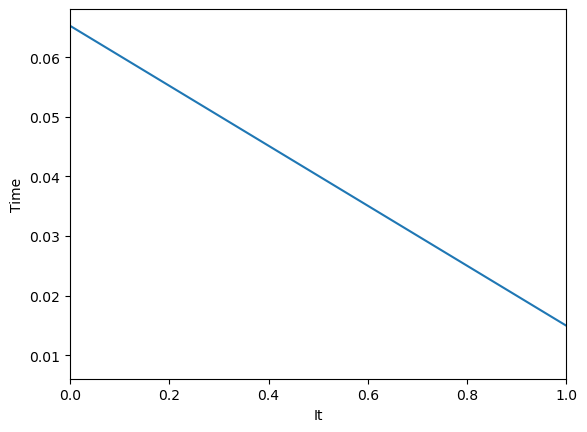

average time for one gibbs sweep:  0.010584815343221029


In [75]:
plt.plot(range(0,len(hdp_hmm.trace[const.TIME])), hdp_hmm.trace[const.TIME], marker="None")
plt.xlabel('It')
plt.ylabel('Time')
plt.xlim(0,1)
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

print('average time for one gibbs sweep: ', np.mean(hdp_hmm.trace[const.TIME]))


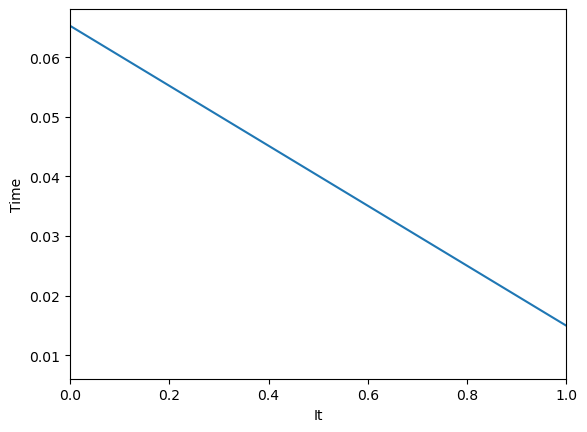

average time for one gibbs sweep:  0.010584815343221029


In [76]:
plt.plot(range(0,len(hdp_hmm.trace[const.TIME])), hdp_hmm.trace[const.TIME], marker="None")
plt.xlabel('It')
plt.ylabel('Time')
plt.xlim(0,1)
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

print('average time for one gibbs sweep: ', np.mean(hdp_hmm.trace[const.TIME]))


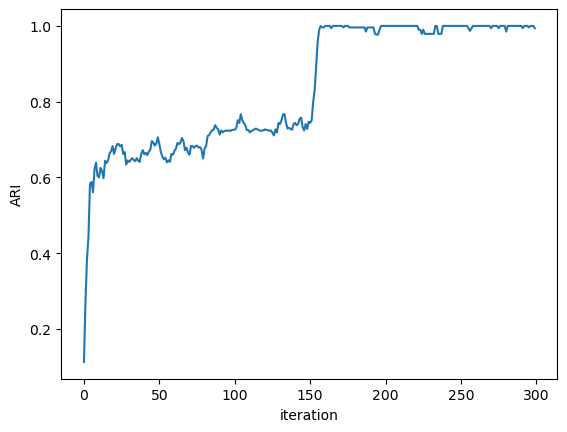

In [77]:
plt.plot(range(0,len(hdp_hmm.ARI)), hdp_hmm.ARI, marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

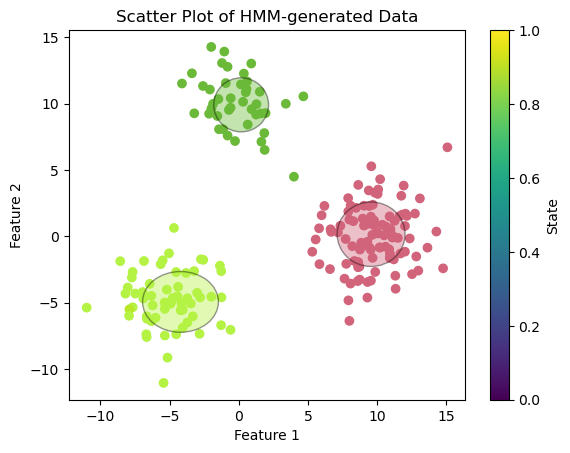

In [78]:
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_data(loaded_data, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma, hdp_hmm.nk, percent=10)